<a id='ldata'></a>
 <a id = "11115"></a><br>

<div>  
<h1><center style="background-color:#c0c0c0; color:black;"><strong>Telco Churn Prediction </strong></center></h1>
</div>

<style>
img
{
    display:block; 
    float:none; 
    margin-left:auto;
    margin-right:auto;
    width:80%;
}
</style> 

<center><span style="font-family:Palatino; font-size:22px;"><i> Did you know that attracting a new customer costs <span style="color:#DC143C;">five times</span> as much as keeping an existing one?</i></span> </center>

<img src="https://userguiding.com/wp-content/uploads/2019/12/reduce-churn.jpg" width="800">

<a id='ldata'></a>
 <a id = "11115"></a><br>

<div>  
<h1><center style="background-color:#c0c0c0; color:black;"><strong>TABLE OF CONTENTS </strong></center></h1>
</div>

1. [Introduction](#1)
2. [Loading libraries and data](#5)
3. [Understanding the data](#6)
4. [Missing values](#7)
5. [Categorical and Numerical Variable Analysis](#55)
6. [Data Visualization](#9)
7. [Data Manipulation](#8)
8. [Correlation](#88)
9. [Data Preprocessing](#10)
10. [Machine Learning Model Evaluations and Predictions](#11)
   * [Hyperparameter tuning GridSearchCV](#1001)
   * [Models](#1002)
       * [KNN](#101)
       * [SVC](#102)
       * [Random Forest](#103)
       * [Logistic Regression](#104)
       * [Decision Tree Classifier](#105)
       * [AdaBoost Classifier](#106)
       * [Gradient Boosting Classifier](#107)
       * [Myzc Classifier](#1007)
10. [Summary & Results](#12)

<a id = "1" ></a>
# <span style="font-family:serif; font-size:28px;"> 1. Introduction</span>
<a id = "introduction" ></a>

<a id = "1" ></a>

<span style="font-size:16px;"> Nowadays, companies are increasingly aware of the importance of subscription services, and the churn rate is a critical indicator to track the health of a subscription-based company. To be more precise, the company can take measures in advance by predicting the customer churn rate to retain customers consistently. Therefore, this project goal is to make a churn prediction so that Telco can optimize products and services proactively..</span>




___

<a id = "5" ></a>
# <span style="font-family:serif; font-size:28px;"> 2. Loading libraries and data</span>
<a id="loading"></a>

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading data
df = pd.read_csv('Telco-Customer-Churn.csv')

___

<a id = "6" ></a>
# <span style="font-family:serif; font-size:28px;"> 3. Understanding the data</span>
<a id = "Undertanding the data" ></a>

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
target="Churn"

In [7]:
df.describe([0.01,0.25,0.75,0.99])

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
1%,0.000000,1.000000,19.200000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
99%,1.000000,72.000000,114.729000
max,1.000000,72.000000,118.750000


<a id = "7" ></a>
# <span style="font-family:serif; font-size:28px;"> 4. Missing values </span>
<a id = "missingvalue" ></a>

In [8]:
#we find data that is missing data and not assigned as "Nan".
df[(df["TotalCharges"]==" ")|(df['tenure'] == 0) ]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


* some missing data is assigned as " " or 0 instead of "Nan"

In [9]:
df.loc[df[df["TotalCharges"]==" "].index,"TotalCharges"]=np.nan
df.loc[df[df['tenure'] == 0].index,"tenure"]=np.nan
df["TotalCharges"]=df["TotalCharges"].astype(float)

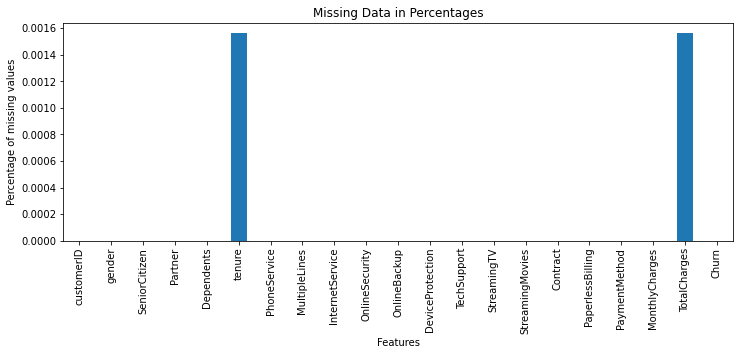

In [10]:
df.isnull().mean().plot.bar(figsize=(12,4)) 
plt.ylabel('Percentage of missing values') 
plt.xlabel('Features') 
plt.title('Missing Data in Percentages');

* we have only 11 missing data.We can fill the missing values with median data, set it to 0 or delete these rows, it is up to you. I prefer deleting these columns because it is a small part compared to all data.


In [11]:
#delete rows including null values
df.dropna(inplace = True)

In [12]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<a id = "55" ></a>
# <span style="font-family:serif; font-size:28px;"> 5. Categorical and Numerical Variable Analysis </span>
<a id = "datavisualization" ></a>

In [13]:
def grab_col_names(dataframe):
    df=dataframe
    cat_th=len(dataframe)//20
    car_th=len(dataframe)//20


    # cat_cols, cat_but_car
    cat_cols_object = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if ((dataframe[col].nunique() < cat_th)and dataframe[col].nunique() < 15) and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols_object + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    

    dfx=pd.DataFrame(np.zeros((len(dataframe.columns), 5)),columns=["cat_cols","num_cols","cat_but_car","num_but_cat","cat_cols_object"])
    dfx.loc[:]="- - -"
    dfx.loc[0]=[len(cat_cols),len(num_cols),len(cat_but_car),len(num_but_cat),len(cat_cols_object)]
    dfx.loc[range(2,len(cat_cols)+2),"cat_cols"]=cat_cols
    dfx.loc[range(2,len(num_cols)+2),"num_cols"]=num_cols
    dfx.loc[range(2,len(cat_but_car)+2),"cat_but_car"]=cat_but_car
    dfx.loc[range(2,len(num_but_cat)+2),"num_but_cat"]=num_but_cat
    dfx.loc[range(2,len(cat_cols_object)+2),"cat_cols_object"]=cat_cols_object
    
    if len(cat_cols)>len(num_cols):
        #print(dfx.iloc[:len(cat_cols)+2])
        pass
    else:
        #print(dfx.iloc[:len(num_cols)+2])
        pass
    return cat_cols, num_cols, cat_but_car,cat_cols_object,dfx

cat_cols, num_cols, cat_but_car,cat_cols_object,dfx = grab_col_names(df)
dfx

,cat_cols,num_cols,cat_but_car,num_but_cat,cat_cols_object
0,17,3,1,1,17
1,- - -,- - -,- - -,- - -,- - -
2,gender,tenure,customerID,SeniorCitizen,customerID
3,Partner,MonthlyCharges,- - -,- - -,gender
4,Dependents,TotalCharges,- - -,- - -,Partner
5,PhoneService,- - -,- - -,- - -,Dependents
6,MultipleLines,- - -,- - -,- - -,PhoneService
7,InternetService,- - -,- - -,- - -,MultipleLines
8,OnlineSecurity,- - -,- - -,- - -,InternetService
9,OnlineBackup,- - -,- - -,- - -,OnlineSecurity


***

<a id = "9" ></a>
# <span style="font-family:serif; font-size:28px;"> 6. Data Visualization </span>
<a id = "datavisualization" ></a>

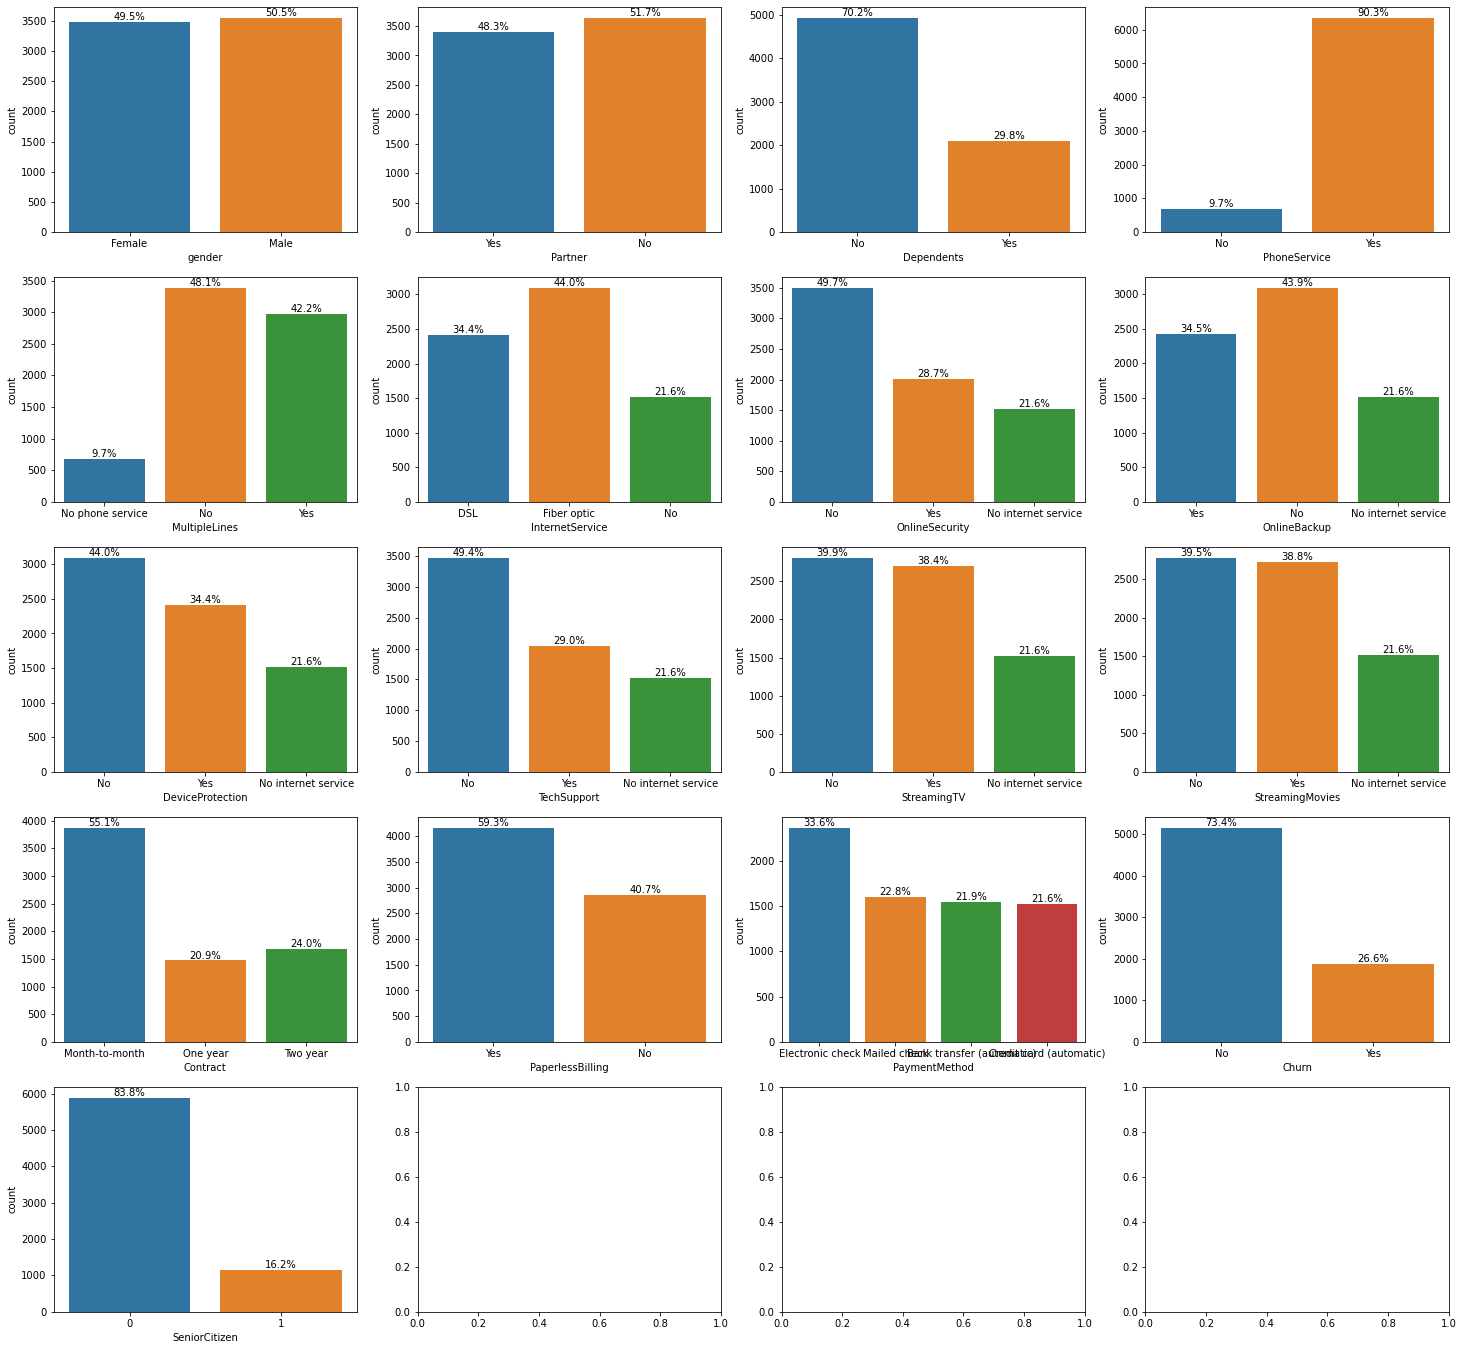

In [14]:
fig, axs = plt.subplots((1+len(cat_cols)//4), 4, figsize=(5*(1+len(cat_cols)//4),24))
#sns.boxplot(x=cat_cols[i], y=target, data=df, ax = axs[r][c])
for i in range(len(cat_cols)):
    col=cat_cols[i]
    sns.countplot(x=df[col], data=df, ax = axs[i//4][i%4])
    
    # add annotations
    ax=axs[i//4][i%4]
    for c in ax.containers:
        labels = [f'{h/df[col].count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
        ax.bar_label(c,labels=labels, label_type='edge')

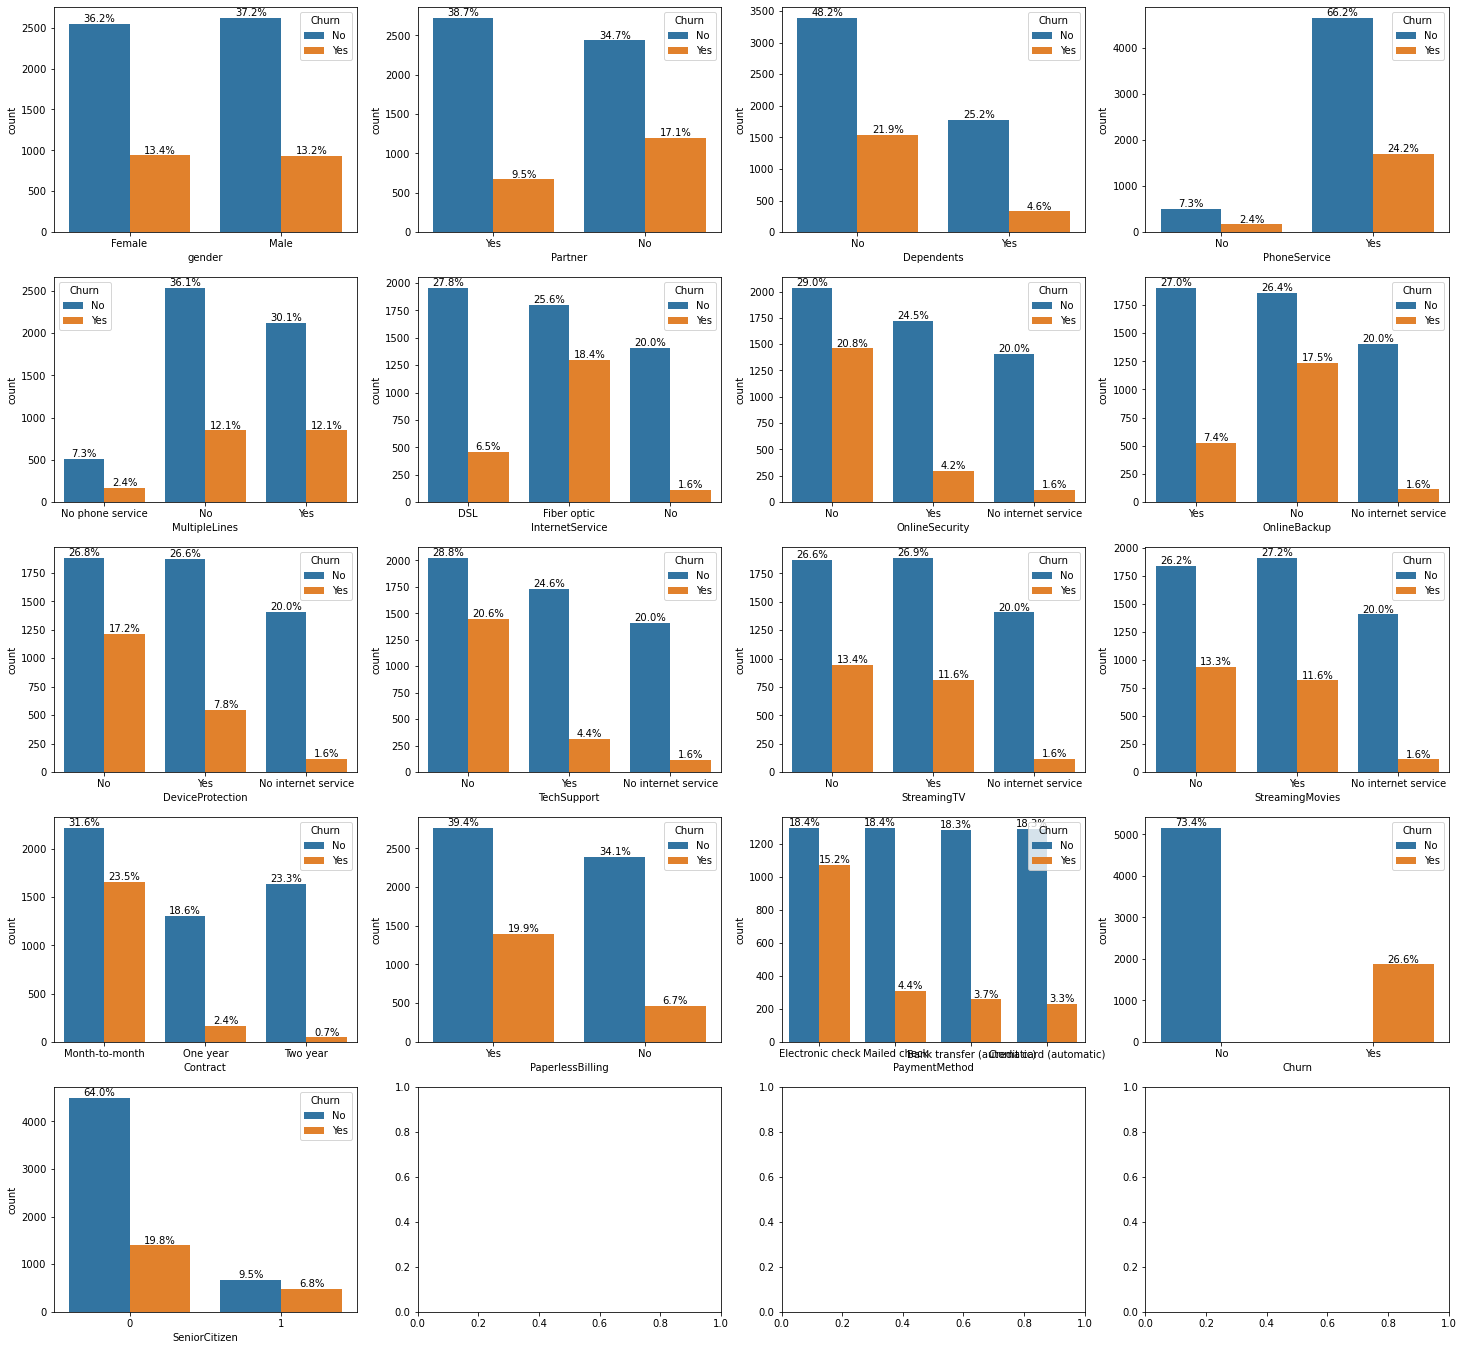

In [15]:
fig, axs = plt.subplots((1+len(cat_cols)//4), 4, figsize=(5*(1+len(cat_cols)//4),24))
for i in range(len(cat_cols)):
    col=cat_cols[i]
    sns.countplot(x=df[col], data=df, ax = axs[i//4][i%4],hue=target)
    
    # add annotations
    ax=axs[i//4][i%4]
    for c in ax.containers:
        labels = [f'{h/df[col].count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
        ax.bar_label(c,labels=labels, label_type='edge')

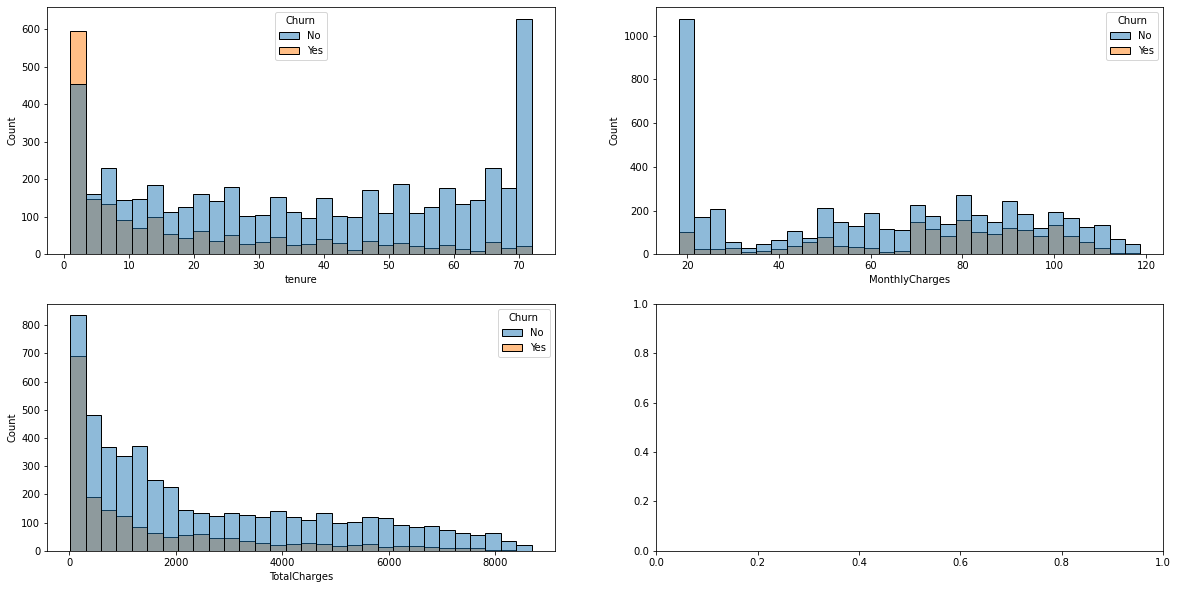

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))
for i in range(len(num_cols)):
    col=num_cols[i]
    sns.histplot(x=df[col], data=df, ax = axs[i//2][i%2],hue=target, bins=30)

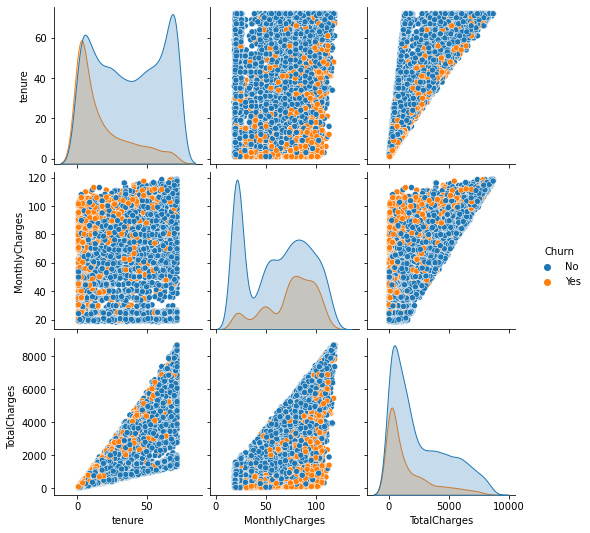

In [17]:
sns.pairplot(df,vars = ['tenure','MonthlyCharges','TotalCharges'], hue="Churn")

***

<a id = "8" ></a>
# <span style="font-family:serif; font-size:28px;"> 7. Data Manipulation </span>
<a id = "8" ></a>

In [20]:
#We don't need customerID column for analyzing, so we can drop this column.
df = df.drop(['customerID'], axis = 1)

In [21]:
for col in df.columns:
    if df[col].nunique()==2 and ("Yes" in df[col].unique()) and ("No" in df[col].unique()):
        for index in df.index:
            if df.loc[index,col]=="Yes":
                df.loc[index,col]=1
            elif df.loc[index,col]=="No":
                df.loc[index,col]=0 
        df[col]=df[col].astype(int)

In [22]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1.0,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34.0,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0


In [23]:
get_dummy_cols=[]
for col in df.columns :
    if df[col].dtypes=="O" and (col in cat_cols_object):
        get_dummy_cols.append(col)
get_dummy_cols

['gender',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [24]:
#get_dummies
df_get_dummies=pd.get_dummies(df[get_dummy_cols],drop_first=True)

#drop dummies
df=df.drop(get_dummy_cols, axis=1)
df=pd.concat([df,df_get_dummies],axis=1)

# scaler variables
for col in df.columns:
    if col not in cat_cols and col !=target:
        df[col]=df[col]/df[col].max()
df.head(3)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0.013889,0,1,0.251368,0.003437,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0.472222,1,0,0.479579,0.217564,0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,0,0,0.027778,1,1,0.453474,0.012453,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<a id = "88" ></a>
# <span style="font-family:serif; font-size:28px;"> 8. Correlation</span>
<a id = "datapreprocessing" ></a>

In [25]:
df_corr=df.corr()
df_corr=df_corr.sort_values("Churn",ascending=False).T.sort_values("Churn",ascending=False)
df_corr=df_corr.round(decimals=2)

<AxesSubplot:>

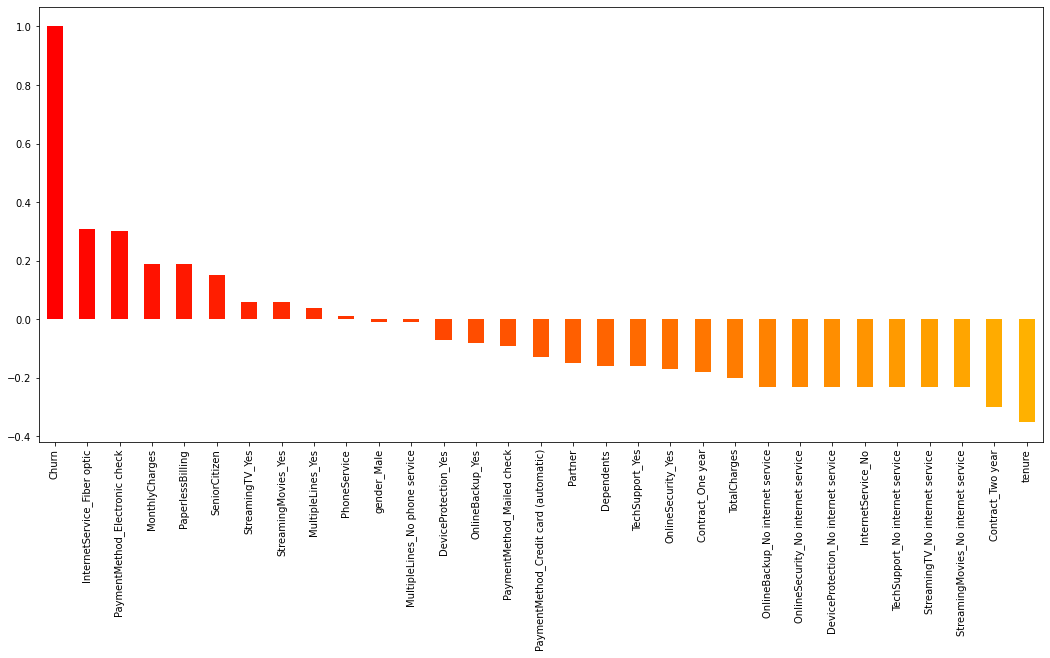

In [26]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(18,8))
df_corr['Churn'].sort_values(ascending = False).plot(kind='bar',label='index',color=plt.cm.hsv(np.arange(len(df))))

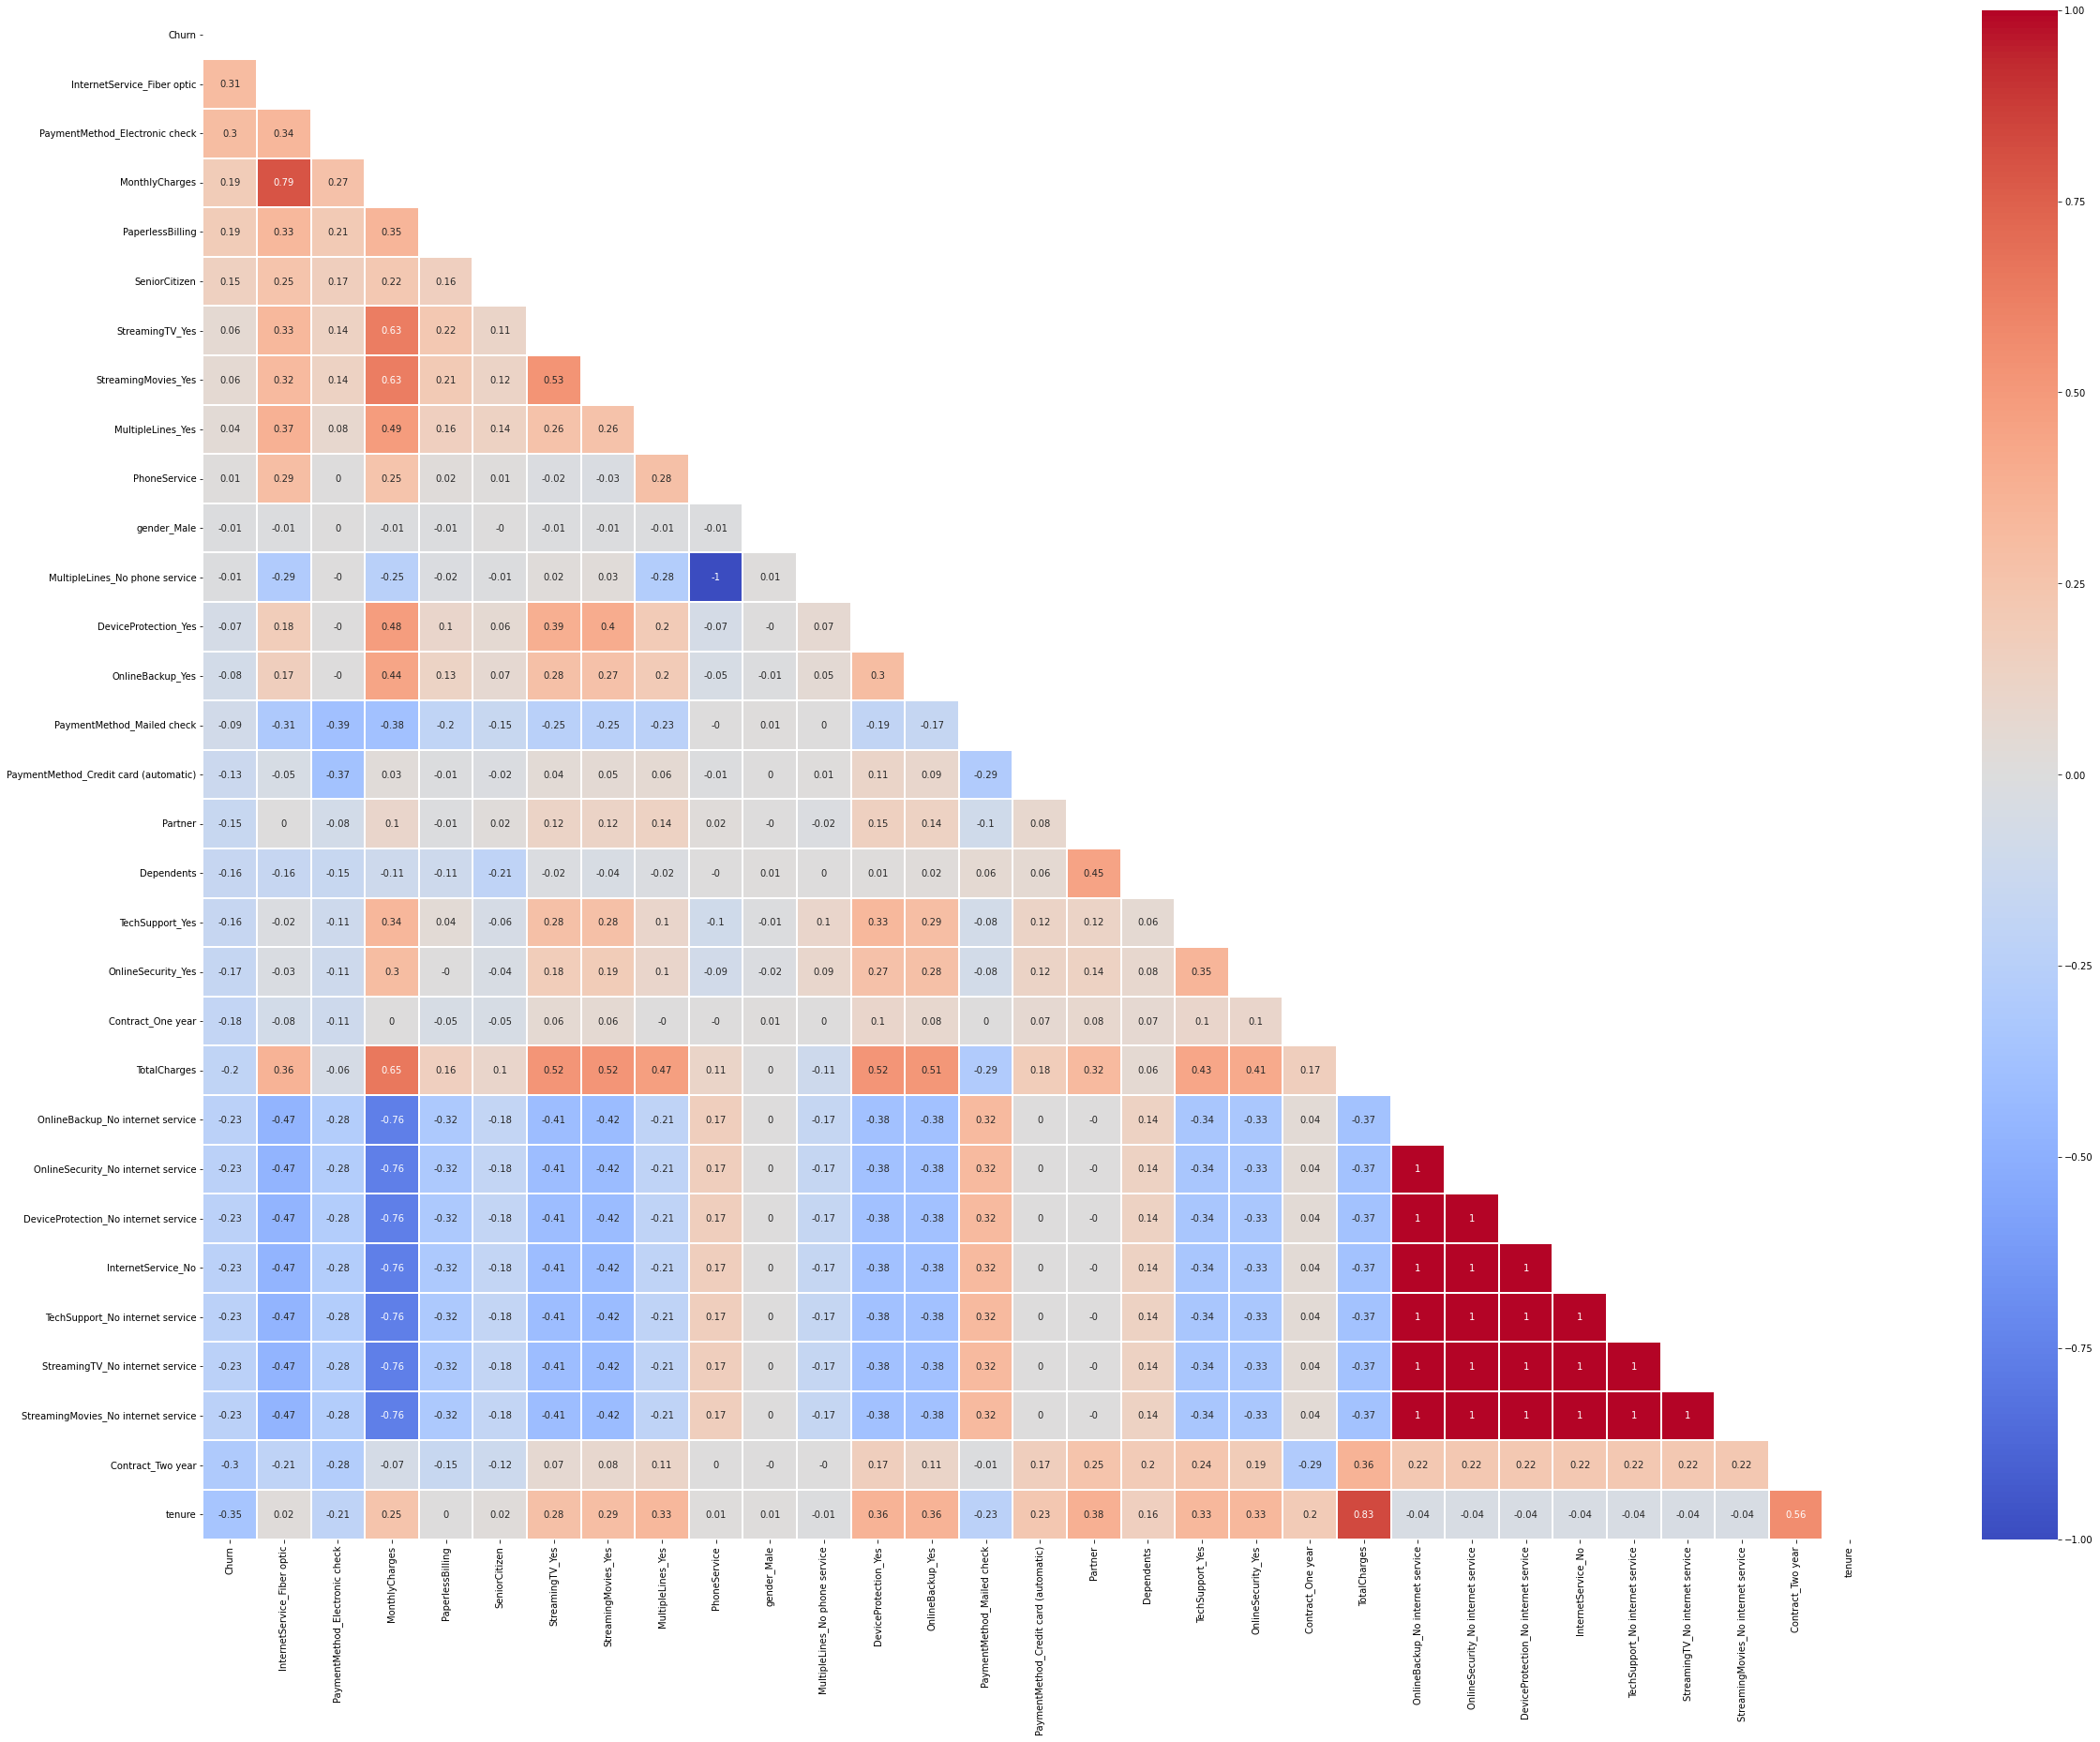

In [27]:
plt.figure(figsize=(40, 30))
mask = np.triu(np.ones_like(df_corr, dtype=bool))
ax = sns.heatmap(df_corr, mask=mask, xticklabels=df_corr.columns, yticklabels=df_corr.columns, annot=True, linewidths=.1, cmap='coolwarm', vmin=-1, vmax=1)

___

<a id = "10" ></a>
# <span style="font-family:serif; font-size:28px;"> 9. Data Preprocessing</span>
<a id = "datapreprocessing" ></a>

<a id = "1111" ></a>
#### **Splitting the data into train and test sets**
<a id = "Split" ></a>

In [28]:
scaler = StandardScaler()
df_sc=df.copy()
df_sc.loc[:] = scaler.fit_transform(df)
df_sc["Churn"]=df["Churn"]

In [29]:
X = df_sc.drop(columns = ['Churn'])
y = df_sc['Churn'].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 42)

In [39]:
# To store models created
best_models = {}

def print_best_parameters(hyperparameters, best_parameters):
    value = "Best parameters: "
    for key in hyperparameters:
        value += str(key) + ": " + str(best_parameters[key]) + ", "
    if hyperparameters:
        print(value[:-2])

def get_best_model(estimator, hyperparameters, fit_params={}):
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
    grid_search = GridSearchCV(estimator=estimator, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring="accuracy")
    best_model = grid_search.fit(X_train, y_train, **fit_params)
    best_parameters = best_model.best_estimator_.get_params()
    print_best_parameters(hyperparameters, best_parameters)
    return best_model

def evaluate_model(model, name):
    print("Accuracy score:", accuracy_score(y_test, model.predict(X_test)))
    best_models[name] = model



<a id = "11" ></a>
# <span style="font-family:serif; font-size:28px;"> 8. Machine Learning Model Evaluations and Predictions</span>
<a id = "modelprediction" ></a>

![](https://miro.medium.com/max/737/1*Xap6OxaZvD7C7eMQKkaHYQ.jpeg)

<a id = "1001" ></a>
## <span style="font-family:serif; font-size:28px;"> Hyperparameter tuning GridSearchCV</span>
<a id = "1001" ></a>

### K-nearest neighbors
* **n_neighbors:** int, default=5
* **weights:** {‘uniform’, ‘distance’} or callable, default=’uniform’
* **algorithm:** {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
* **leaf_size:** int, default=30
* **p:** int, default=2
* **n_neighbors:** int, default=5

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
hyperparameters = {
    'n_neighbors' : list(range(3,15,3)),
#     'weights'     : ['uniform', 'distance'],
#     'algorithm'   : ['auto', 'ball_tree', 'kd_tree', 'brute'],
#     'leaf_size'   : list(range(10,50,10)),
#     'p'           : [1,2]
}
estimator = KNeighborsClassifier()
best_model_kneighbors = get_best_model(estimator, hyperparameters)

Best parameters: n_neighbors: 12


In [40]:
evaluate_model(best_model_kneighbors.best_estimator_, 'kneighbors')

Accuracy score: 0.7781990521327015


### Random Forest Classifier

* **n_estimators:** int, default=100
* **max_features:** {“auto”, “sqrt”, “log2”}, int or float, default=”auto”
* **max_depth:** int, default=None
* **min_samples_split:** int or float, default=2
* **min_samples_leaf:** int or float, default=1

In [ ]:
# I disabled some parameters because the process was taking too long. you can activate.
hyperparameters = {
    'n_estimators'      : list(range(100, 2000, 800)),
    #'max_features'      : ['auto', 'sqrt', 'log2'],
    #'criterion'         : ['gini', 'entropy'],
    #'max_depth'         : [None, 1,  3,  5],
    #'min_samples_split' : list(range(2,6,2)),
    'min_samples_leaf'  : list(range(1,6,2))
}
estimator = RandomForestClassifier(random_state=1)
best_model_random_forest = get_best_model(estimator, hyperparameters)

In [ ]:
evaluate_model(best_model_random_forest.best_estimator_, 'random_forest')

<a id = "1002" ></a>
## <b> Models</b>
<a id = "1002" ></a>

In [170]:
accuracy_scores={}
def show_confusion_matrix_func(predicted_y,model_name):
    try:
        print("\n","-"*100)
        plt.figure(figsize=(4,3))
        sns.heatmap(confusion_matrix(y_test, predicted_y),
                        annot=True,fmt = "d",linecolor="k",linewidths=3)
        plt.title((model_name+" confusion matrix"),fontsize=14)
        plt.show()
    except:
        pass    
def show_ROC_Curve_func(model,model_name):
    try:
        y_pred_prob = model.predict_proba(X_test)[:,1]
        print("\n","-"*100,"\n")
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        plt.plot([0, 1], [0, 1], 'k--' )
        plt.plot(fpr, tpr, label=model_name,color = "r")
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title((model_name+' ROC Curve'),fontsize=16)
        plt.show();
    except:
        pass

def find_accuracy(model,model_name,show_classification_report="Yes",show_confusion_matrix="Yes",show_ROC_Curve="Yes"  ):
    model.fit(X_train,y_train)
    predicted_y = model.predict(X_test)
    accuracy= model.score(X_test,y_test)
    print("\n",model_name,"accuracy:",accuracy )
    accuracy_scores[model_name]=round(accuracy,3)
    if show_classification_report=="Yes":
        print("\n","-"*100,"\n",classification_report(y_test, predicted_y))
    
    if show_confusion_matrix=="Yes":
        show_confusion_matrix_func(predicted_y,model_name)
    if show_ROC_Curve=="Yes":
        show_ROC_Curve_func(model,model_name)
    
    return model,predicted_y

def Myzc_model_fonk(Myzc_model):
    predicted_=pd.DataFrame(Myzc_model).mode().values[0]
    accuracy=accuracy_score(y_test, predicted_)
    cr=classification_report(y_test, predicted_)
    print("\n","Myzc Classifier",accuracy,"\n","-"*100,"\n", cr)
    show_confusion_matrix_func(predicted_,model_name)
    accuracy_scores["Myzc Classifier"]=round(accuracy,3)

<a id = "101" ></a>
#### <b> KNN</b>
<a id = "knn" ></a>


 KNN accuracy: 0.7781990521327015

 ---------------------------------------------------------------------------------------------------- 
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      1549
           1       0.61      0.47      0.53       561

    accuracy                           0.78      2110
   macro avg       0.71      0.68      0.69      2110
weighted avg       0.77      0.78      0.77      2110


 ----------------------------------------------------------------------------------------------------


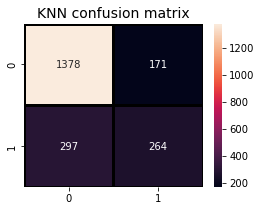


 ---------------------------------------------------------------------------------------------------- 



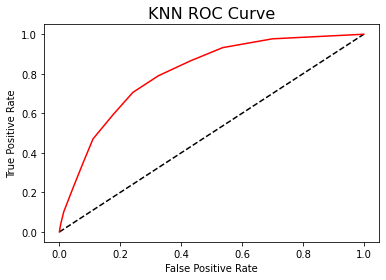

In [171]:
knn_model = KNeighborsClassifier(**best_model_kneighbors.best_estimator_.get_params()) 
knn_model,knn_model_predicted_y=find_accuracy(knn_model,"KNN")

<a id = "102" ></a>
#### <b>SVC</b>
<a id = "svc" ></a>


 SVM accuracy: 0.7924170616113744

 ---------------------------------------------------------------------------------------------------- 
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.65      0.48      0.55       561

    accuracy                           0.79      2110
   macro avg       0.74      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110


 ----------------------------------------------------------------------------------------------------


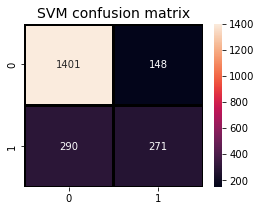

In [172]:
svc_model = SVC(random_state = 1)
svc_model,svc_model_predicted_y=find_accuracy(svc_model,"SVM")

<a id = "103" ></a>
#### <b> Random Forest</b>
<a id = "rf" ></a>


 RandomForest accuracy: 0.7919431279620853

 ---------------------------------------------------------------------------------------------------- 
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1549
           1       0.66      0.44      0.53       561

    accuracy                           0.79      2110
   macro avg       0.74      0.68      0.70      2110
weighted avg       0.78      0.79      0.78      2110


 ----------------------------------------------------------------------------------------------------


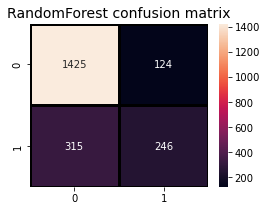


 ---------------------------------------------------------------------------------------------------- 



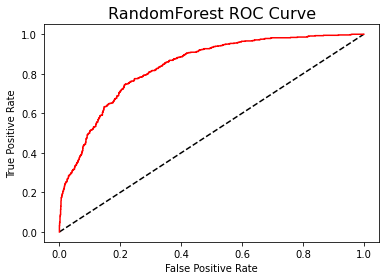

In [173]:
rf_model = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
rf_model,rf_model_predicted_y=find_accuracy(rf_model,"RandomForest")

<a id = "104" ></a>
#### <b>Logistic Regression</b>
<a id = "lr" ></a>

In [174]:
lr_model = LogisticRegression()
lr_model,lr_model_predicted_y=find_accuracy(lr_model,"LogisticRegression","No","No","No")


 LogisticRegression accuracy: 0.79478672985782


<a id = "105" ></a>
#### **Decision Tree Classifier**
<a id = "dtc" ></a>

In [175]:
dt_model = DecisionTreeClassifier()
dt_model,dt_model_predicted_y=find_accuracy(dt_model,"DecisionTreeClassifier","No","No","No")


 DecisionTreeClassifier accuracy: 0.728909952606635


<a id = "106" ></a>
#### **AdaBoost Classifier**
<a id = "ada" ></a>

In [176]:
adaboost_model = AdaBoostClassifier()
adaboost_model,adaboost_model_predicted_y=find_accuracy(adaboost_model,"AdaBoostClassifier","No","No","No")


 AdaBoostClassifier accuracy: 0.7971563981042654


<a id = "107" ></a>
#### **Gradient Boosting Classifier**
<a id = "gb" ></a>

In [177]:
gb_model = GradientBoostingClassifier()
gb_model,gb_model_predicted_y=find_accuracy(gb_model,"GradientBoostingClassifier","No","No","No")


 GradientBoostingClassifier accuracy: 0.8


In [178]:
accuracy_scores

{'KNN': 0.778,
 'SVM': 0.792,
 'RandomForest': 0.792,
 'LogisticRegression': 0.795,
 'DecisionTreeClassifier': 0.729,
 'AdaBoostClassifier': 0.797,
 'GradientBoostingClassifier': 0.8}

<a id = "1007" ></a>
#### **Myzc Classifier**
<a id = "1007" ></a>


 Myzc Classifier 0.8042654028436019 
 ---------------------------------------------------------------------------------------------------- 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.66      0.54      0.60       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.80      0.80      2110


 ----------------------------------------------------------------------------------------------------


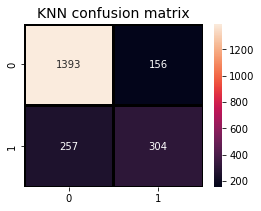

In [181]:
Myzc_model=[gb_model_predicted_y,adaboost_model_predicted_y,lr_model_predicted_y]
Myzc_model_fonk(Myzc_model)

<a id='ldata'></a>
 <a id = "12"></a><br>

<div>  
<h1><center style="background-color:#c0c0c0; color:black;"><strong>SUMMARY & RESULTS </strong></center></h1>
</div>

<a id="12"></a>

In [199]:
results_df=pd.DataFrame()
results_df["accuracy"]=accuracy_scores.values()
results_df.index=accuracy_scores.keys()
results_df=results_df.sort_values("accuracy",ascending=False)
results_df

,accuracy
Myzc Classifier,0.804
GradientBoostingClassifier,0.800
AdaBoostClassifier,0.797
LogisticRegression,0.795
SVM,0.792
RandomForest,0.792
KNN,0.778
DecisionTreeClassifier,0.729


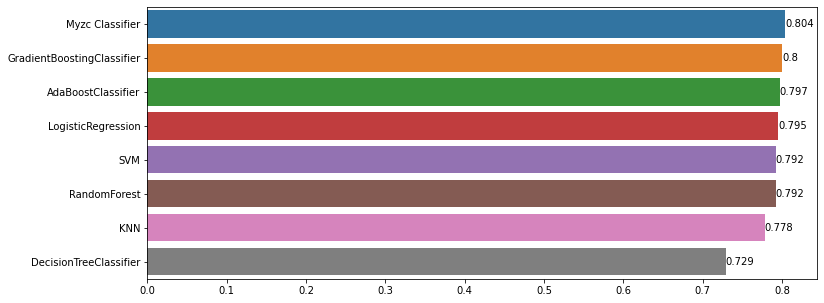

In [204]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x=results_df['accuracy'].values,y=results_df.index, data=results_df[['accuracy']]);
for container in ax.containers:
    ax.bar_label(container)

**Myzc Classifier** model, which **I developed** using models, achieved the **highest accuracy** result.

![](https://amessagewithabottle.com/wp-content/uploads/2019/09/moneyball-1024x550.jpg)

I hope all of you did gain some insights to Machine Learning. Some other my notebooks for Machine Learning are: 
1) https://www.kaggle.com/code/mustafayazici/house-price-eda-ml-visualization

2) https://www.kaggle.com/code/mustafayazici/salary-prediction-with-ml-models-basebal

3) https://www.kaggle.com/mustafayazici/code

4) https://github.com/Mustafa-YAZICI?tab=repositories

<span style="color:crimson;font-family:serif; font-size:20px;">  Please upvote if you liked the kernel! 😀
    <p style="color:royalblue;font-family:serif; font-size:20px;">KEEP KAGGLING!</p> 
</span>